<a href="https://colab.research.google.com/github/0sant1ago/CommunityForum/blob/main/Te_damos_la_bienvenida_a_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from math import sin

# --- Objective Function Components ---

def f(x):
    return x**2

def grad_of_f(x):
    return 2 * x

def d(x, coeff_a, coeff_b):
    return 1 + np.sum([coeff_a[i] * (sin(coeff_b[i] * x[i])**2) for i in range(len(x))])

def grad_of_d(x, coeff_a, coeff_b):
    n = len(x)
    norm_x = norm(x)
    grad = np.zeros(n)
    for i in range(n):
        if norm_x == 0:
            grad[i] = 0
        else:
            grad[i] = coeff_a[i] * np.sin(2 * coeff_b[i] * x[i]) * coeff_b[i] / norm_x
    return grad

def h(x, coeff_a, coeff_b):
    norm_x = norm(x)
    if norm_x == 0:
        return 0.0
    x_i = x / norm_x
    return f(norm_x) * d(x_i, coeff_a, coeff_b)

def grad_of_h(x, coeff_a, coeff_b):
    norm_x = norm(x)
    if norm_x == 0:
        return np.zeros_like(x)
    x_i = x / norm_x
    df = grad_of_f(norm_x) * (x / norm_x)  # Chain rule
    grad_d = grad_of_d(x_i, coeff_a, coeff_b)
    return df * d(x_i, coeff_a, coeff_b) + f(norm_x) * (grad_d / norm_x)

# --- Constraint function g(x) = max <a_i,x> + b_i ---

def g_i(coef, x):
    a_i = coef[:-1]
    b_i = coef[-1]
    return np.dot(a_i, x) + b_i

def g(x, coefficients_list):
    return max([g_i(coef, x) for coef in coefficients_list])

def grad_of_g(x, coefficients_list):
    # Find active constraint
    max_val = float('-inf')
    grad = None
    for coef in coefficients_list:
        val = g_i(coef, x)
        if val > max_val:
            max_val = val
            grad = coef[:-1]
    return np.array(grad)

# --- Mirror Descent with AdaGrad ---

def Alg_AdaGrad(N, epsilon, coeff_a, coeff_b, coefficients_list):
    x = np.random.randn(len(coeff_a))  # Initialize randomly
    Theta = 25
    Sum_M_i = 0
    h_values = []
    iterations = []

    for k in range(1, N+1):
        if g(x, coefficients_list) <= epsilon:
            grad_f = grad_of_h(x, coeff_a, coeff_b)
            M_k = norm(grad_f)
            Sum_M_i += M_k**2
            h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
            x = x - h_k * grad_f
        else:
            grad_g = grad_of_g(x, coefficients_list)
            M_k = norm(grad_g)
            Sum_M_i += M_k**2
            h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
            x = x - h_k * grad_g

        fx = h(x, coeff_a, coeff_b)
        h_values.append(fx)
        iterations.append(k)

    return x, h_values, iterations


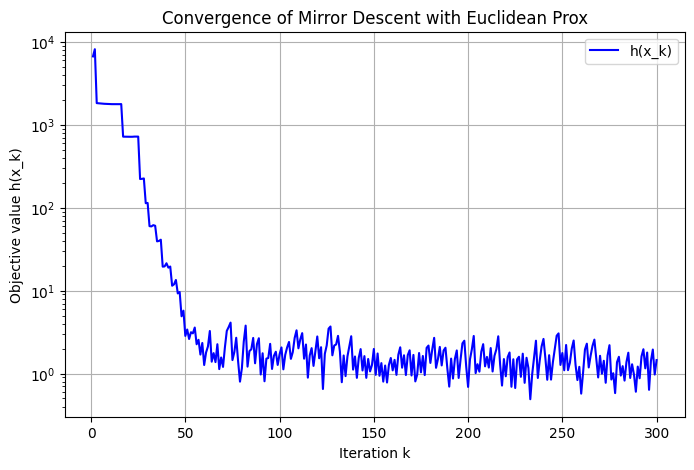

In [ ]:
# Initialize problem parameters
np.random.seed(42)
dim = 100
coeff_a = np.random.rand(dim)
coeff_b = np.random.rand(dim) * 10  # oscillation frequencies

# Linear constraint coefficients (a_i, b_i) tuples
coefficients_list = [np.append(np.random.randn(dim), np.random.randn()) for _ in range(10)]

# Run the algorithm
x_star, h_vals, iters = Alg_AdaGrad(N=300, epsilon=0.1, coeff_a=coeff_a, coeff_b=coeff_b, coefficients_list=coefficients_list)

# Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(iters, h_vals, label='h(x_k)', color='blue')
plt.xlabel('Iteration k')
plt.ylabel('Objective value h(x_k)')
plt.title('Convergence of Mirror Descent with Euclidean Prox')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


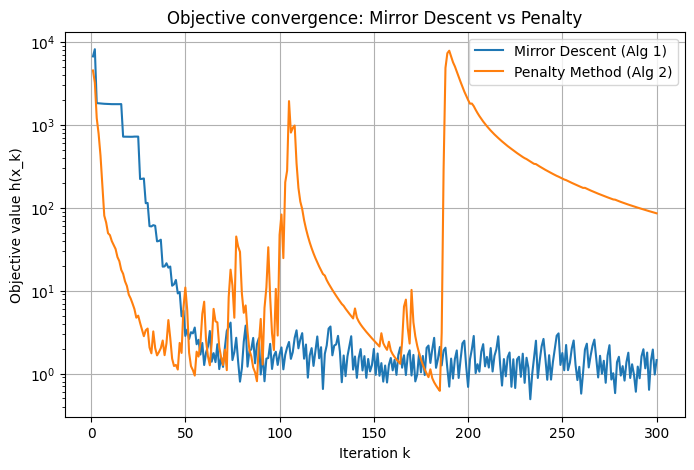

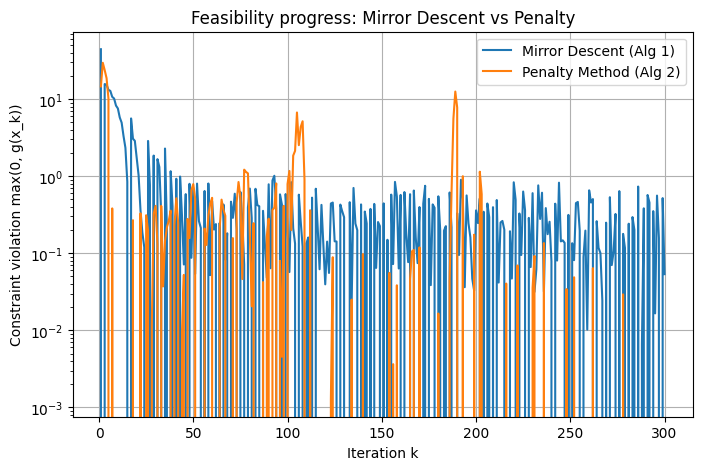

In [1]:
# Let's take the user's code, add a Penalty Function algorithm for inequality constraints,
# make both algorithms share the same initial point for a fair benchmark,
# run them, and plot their objective values (and separately, constraint violation).

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from math import sin

# --- Objective Function Components ---

def f(x):
    return x**2

def grad_of_f(x):
    return 2 * x

def d(x, coeff_a, coeff_b):
    return 1 + np.sum([coeff_a[i] * (sin(coeff_b[i] * x[i])**2) for i in range(len(x))])

def grad_of_d(x, coeff_a, coeff_b):
    n = len(x)
    norm_x = norm(x)
    grad = np.zeros(n)
    for i in range(n):
        if norm_x == 0:
            grad[i] = 0
        else:
            grad[i] = coeff_a[i] * np.sin(2 * coeff_b[i] * x[i]) * coeff_b[i] / norm_x
    return grad

def h(x, coeff_a, coeff_b):
    norm_x = norm(x)
    if norm_x == 0:
        return 0.0
    x_i = x / norm_x
    return f(norm_x) * d(x_i, coeff_a, coeff_b)

def grad_of_h(x, coeff_a, coeff_b):
    norm_x = norm(x)
    if norm_x == 0:
        return np.zeros_like(x)
    x_i = x / norm_x
    df = grad_of_f(norm_x) * (x / norm_x)  # Chain rule
    grad_d = grad_of_d(x_i, coeff_a, coeff_b)
    return df * d(x_i, coeff_a, coeff_b) + f(norm_x) * (grad_d / norm_x)

# --- Constraint function g(x) = max_i <a_i,x> + b_i ---

def g_i(coef, x):
    a_i = coef[:-1]
    b_i = coef[-1]
    return np.dot(a_i, x) + b_i

def g(x, coefficients_list):
    return max([g_i(coef, x) for coef in coefficients_list])

def grad_of_g(x, coefficients_list):
    # Find active constraint
    max_val = float('-inf')
    grad = None
    for coef in coefficients_list:
        val = g_i(coef, x)
        if val > max_val:
            max_val = val
            grad = coef[:-1]
    return np.array(grad)

# --- Mirror Descent with (Euclidean) AdaGrad step switching on feasibility ---
def Alg_AdaGrad(N, epsilon, coeff_a, coeff_b, coefficients_list, x0=None, Theta=25.0):
    if x0 is None:
        x = np.random.randn(len(coeff_a))  # Initialize randomly
    else:
        x = x0.copy()
    Sum_M_i = 0.0
    h_values, g_values, iterations = [], [], []

    for k in range(1, N+1):
        if g(x, coefficients_list) <= epsilon:
            grad_f = grad_of_h(x, coeff_a, coeff_b)
            M_k = norm(grad_f)
            Sum_M_i += M_k**2
            h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
            x = x - h_k * grad_f
        else:
            grad_g = grad_of_g(x, coefficients_list)
            M_k = norm(grad_g)
            Sum_M_i += M_k**2
            h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
            x = x - h_k * grad_g

        fx = h(x, coeff_a, coeff_b)
        h_values.append(fx)
        g_values.append(max(0.0, g(x, coefficients_list)))
        iterations.append(k)

    return x, h_values, g_values, iterations

# --- Exterior Penalty Method with squared hinge (inequality) + AdaGrad ---
# Minimize:  h(x) + mu * max(0, g(x))^2
def Alg_Penalty(N, coeff_a, coeff_b, coefficients_list, x0=None, mu0=1.0, mu_growth=1.02, Theta=25.0):
    if x0 is None:
        x = np.random.randn(len(coeff_a))
    else:
        x = x0.copy()
    mu = mu0
    Sum_M_i = 0.0
    h_values, g_values, iterations = [], [], []

    for k in range(1, N+1):
        # penalty term
        g_val = g(x, coefficients_list)
        hinge = max(0.0, g_val)
        grad_pen = np.zeros_like(x)
        if hinge > 0:
            grad_pen = 2.0 * mu * hinge * grad_of_g(x, coefficients_list)

        grad_total = grad_of_h(x, coeff_a, coeff_b) + grad_pen

        M_k = norm(grad_total)
        Sum_M_i += M_k**2
        h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
        x = x - h_k * grad_total

        # slightly increase mu over time to emphasize feasibility
        mu *= mu_growth

        fx = h(x, coeff_a, coeff_b)
        h_values.append(fx)
        g_values.append(max(0.0, g_val))
        iterations.append(k)

    return x, h_values, g_values, iterations

# --- Initialize problem parameters ---
np.random.seed(42)
dim = 100
coeff_a = np.random.rand(dim)
coeff_b = np.random.rand(dim) * 10  # oscillation frequencies

# Linear constraint coefficients (a_i, b_i) rows
coefficients_list = [np.append(np.random.randn(dim), np.random.randn()) for _ in range(10)]

# Shared initial point for a fair comparison
x0 = np.random.randn(dim)

# Run algorithms
N = 300
epsilon = 0.1

x_md, h_md, g_md, it_md = Alg_AdaGrad(
    N=N, epsilon=epsilon, coeff_a=coeff_a, coeff_b=coeff_b,
    coefficients_list=coefficients_list, x0=x0, Theta=25.0
)

x_pen, h_pen, g_pen, it_pen = Alg_Penalty(
    N=N, coeff_a=coeff_a, coeff_b=coeff_b, coefficients_list=coefficients_list,
    x0=x0, mu0=1.0, mu_growth=1.02, Theta=25.0
)

# --- Plot: Objective values ---
plt.figure(figsize=(8,5))
plt.plot(it_md, h_md, label='Mirror Descent (Alg 1)')
plt.plot(it_pen, h_pen, label='Penalty Method (Alg 2)')
plt.xlabel('Iteration k')
plt.ylabel('Objective value h(x_k)')
plt.title('Objective convergence: Mirror Descent vs Penalty')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

# --- Plot: Constraint violation max(0, g(x)) ---
plt.figure(figsize=(8,5))
plt.plot(it_md, g_md, label='Mirror Descent (Alg 1)')
plt.plot(it_pen, g_pen, label='Penalty Method (Alg 2)')
plt.xlabel('Iteration k')
plt.ylabel('Constraint violation max(0, g(x_k))')
plt.title('Feasibility progress: Mirror Descent vs Penalty')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


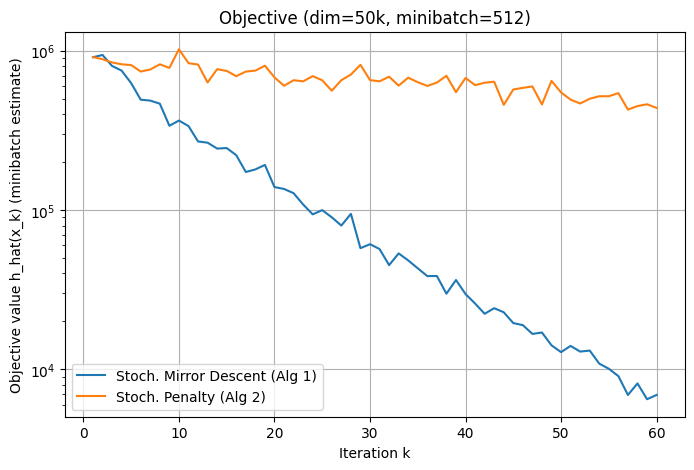

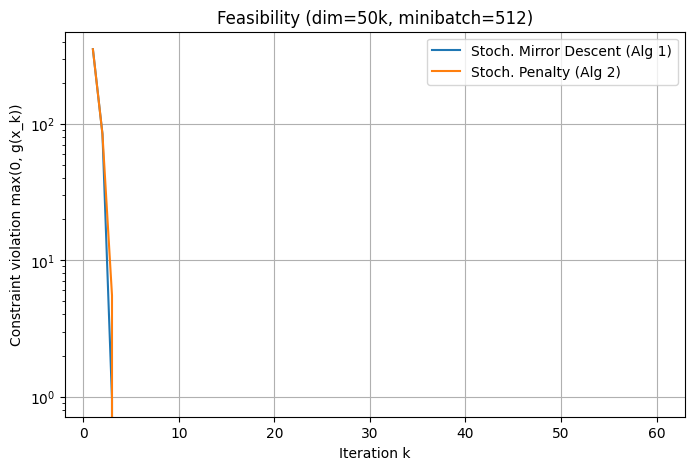

In [1]:
# Faster run: keep "order of 1e5" by using 50k dims, fewer iters, smaller minibatch & fewer constraints.
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

def f_scalar(r): return r**2
def grad_f_scalar(r): return 2.0 * r

def d_estimate(x_unit, coeff_a, coeff_b, S, n):
    if len(S) == 0: return 1.0
    vals = coeff_a[S] * (np.sin(coeff_b[S] * x_unit[S])**2)
    return 1.0 + (n / len(S)) * np.sum(vals)

def grad_d_estimate(x_unit, coeff_a, coeff_b, S, n, inv_norm):
    g = np.zeros_like(x_unit)
    if len(S) == 0: return g
    g[S] = (n / len(S)) * (coeff_a[S] * np.sin(2.0 * coeff_b[S] * x_unit[S]) * coeff_b[S] * inv_norm)
    return g

def grad_h_stochastic(x, coeff_a, coeff_b, batch_size):
    n = x.shape[0]
    r = norm(x)
    if r == 0.0:
        return np.zeros_like(x), 1.0
    x_unit = x / r
    S = np.arange(n) if batch_size >= n else np.random.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, coeff_a, coeff_b, S, n)
    grad_d_hat = grad_d_estimate(x_unit, coeff_a, coeff_b, S, n, inv_norm=1.0/r)
    df_vec = grad_f_scalar(r) * (x / r)  # equals 2*x
    gh = df_vec * d_hat + f_scalar(r) * (grad_d_hat / r)
    return gh, d_hat

def d_estimate_only(x, coeff_a, coeff_b, batch_size):
    n = x.shape[0]
    r = norm(x)
    if r == 0.0:
        return 1.0
    x_unit = x / r
    S = np.arange(n) if batch_size >= n else np.random.choice(n, size=batch_size, replace=False)
    return d_estimate(x_unit, coeff_a, coeff_b, S, n)

def h_estimate(x, coeff_a, coeff_b, batch_size):
    r = norm(x)
    d_hat = d_estimate_only(x, coeff_a, coeff_b, batch_size)
    return f_scalar(r) * d_hat

def g_vals_and_argmax(A, b, x):
    vals = A.dot(x) + b
    idx = np.argmax(vals)
    return vals, idx

def Alg_AdaGrad_Stochastic(N, epsilon, coeff_a, coeff_b, A, b, x0, Theta=25.0, batch_size=512):
    x = x0.copy()
    Sum_M_i = 0.0
    h_track = []
    g_track = []
    it_track = []
    for k in range(1, N+1):
        vals, idx = g_vals_and_argmax(A, b, x)
        gval = vals[idx]
        if gval <= epsilon:
            grad_h_hat, _ = grad_h_stochastic(x, coeff_a, coeff_b, batch_size)
            grad = grad_h_hat
        else:
            grad = A[idx]
        M_k = norm(grad) or 1e-12
        Sum_M_i += M_k**2
        h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
        x -= h_k * grad
        h_track.append(h_estimate(x, coeff_a, coeff_b, batch_size))
        g_track.append(max(0.0, gval))
        it_track.append(k)
    return x, np.array(h_track), np.array(g_track), np.array(it_track)

def Alg_Penalty_Stochastic(N, coeff_a, coeff_b, A, b, x0, mu0=1.0, mu_growth=1.02, Theta=25.0, batch_size=512):
    x = x0.copy()
    mu = mu0
    Sum_M_i = 0.0
    h_track = []
    g_track = []
    it_track = []
    for k in range(1, N+1):
        vals, idx = g_vals_and_argmax(A, b, x)
        gval = vals[idx]
        hinge = max(0.0, gval)
        grad_h_hat, _ = grad_h_stochastic(x, coeff_a, coeff_b, batch_size)
        grad_pen = 2.0 * mu * hinge * A[idx] if hinge > 0.0 else np.zeros_like(x)
        grad_total = grad_h_hat + grad_pen
        M_k = norm(grad_total) or 1e-12
        Sum_M_i += M_k**2
        h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
        x -= h_k * grad_total
        mu *= mu_growth
        h_track.append(h_estimate(x, coeff_a, coeff_b, batch_size))
        g_track.append(max(0.0, gval))
        it_track.append(k)
    return x, np.array(h_track), np.array(g_track), np.array(it_track)

# --- Setup ---
np.random.seed(42)
dim = 50_000            # still on the order of 1e5
coeff_a = np.random.rand(dim).astype(np.float64)
coeff_b = (np.random.rand(dim) * 10.0).astype(np.float64)
m = 5                   # fewer constraints for speed
A = np.random.randn(m, dim).astype(np.float64)
b = np.random.randn(m).astype(np.float64)
x0 = np.random.randn(dim).astype(np.float64)

# Run
N = 60
epsilon = 0.1
batch_size = 512

x_md, h_md, g_md, it_md = Alg_AdaGrad_Stochastic(N, epsilon, coeff_a, coeff_b, A, b, x0, Theta=25.0, batch_size=batch_size)
x_pen, h_pen, g_pen, it_pen = Alg_Penalty_Stochastic(N, coeff_a, coeff_b, A, b, x0, mu0=1.0, mu_growth=1.02, Theta=25.0, batch_size=batch_size)

# Plots
plt.figure(figsize=(8,5))
plt.plot(it_md, h_md, label='Stoch. Mirror Descent (Alg 1)')
plt.plot(it_pen, h_pen, label='Stoch. Penalty (Alg 2)')
plt.xlabel('Iteration k')
plt.ylabel('Objective value h_hat(x_k) (minibatch estimate)')
plt.title('Objective (dim=50k, minibatch={})'.format(batch_size))
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(it_md, g_md, label='Stoch. Mirror Descent (Alg 1)')
plt.plot(it_pen, g_pen, label='Stoch. Penalty (Alg 2)')
plt.xlabel('Iteration k')
plt.ylabel('Constraint violation max(0, g(x_k))')
plt.title('Feasibility (dim=50k, minibatch={})'.format(batch_size))
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()



In [2]:
# Run the stochastic algorithms for 100 iterations (dim ~ 50k)
# and compute a principled "actual minimum" via the minimum-norm feasible point:
#   min ||x||^2 s.t. A x + b <= 0
# which we can solve exactly via a small convex QP in the dual:
#   min_{λ >= 0} 0.5 * ||A^T λ||^2 + b^T λ
# Then x* = -A^T λ*
# For the original h(x) = ||x||^2 * d(x/||x||), the global optimum is in [||x*||^2, ||x*||^2 * d(unit(x*))].
# We will report the exact h(x*) as a concrete upper bound, plus the lower bound ||x*||^2.

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# ---------- Shared helpers from previous cell ----------
def f_scalar(r): return r**2
def grad_f_scalar(r): return 2.0 * r

def d_estimate(x_unit, coeff_a, coeff_b, S, n):
    if len(S) == 0: return 1.0
    vals = coeff_a[S] * (np.sin(coeff_b[S] * x_unit[S])**2)
    return 1.0 + (n / len(S)) * np.sum(vals)

def grad_d_estimate(x_unit, coeff_a, coeff_b, S, n, inv_norm):
    g = np.zeros_like(x_unit)
    if len(S) == 0: return g
    g[S] = (n / len(S)) * (coeff_a[S] * np.sin(2.0 * coeff_b[S] * x_unit[S]) * coeff_b[S] * inv_norm)
    return g

def grad_h_stochastic(x, coeff_a, coeff_b, batch_size):
    n = x.shape[0]
    r = norm(x)
    if r == 0.0:
        return np.zeros_like(x), 1.0
    x_unit = x / r
    S = np.arange(n) if batch_size >= n else np.random.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, coeff_a, coeff_b, S, n)
    grad_d_hat = grad_d_estimate(x_unit, coeff_a, coeff_b, S, n, inv_norm=1.0/r)
    df_vec = grad_f_scalar(r) * (x / r)  # equals 2*x
    gh = df_vec * d_hat + f_scalar(r) * (grad_d_hat / r)
    return gh, d_hat

def d_full(x_unit, coeff_a, coeff_b):
    return 1.0 + np.sum(coeff_a * (np.sin(coeff_b * x_unit)**2))

def h_full(x, coeff_a, coeff_b):
    r = norm(x)
    if r == 0.0: return 0.0
    return f_scalar(r) * d_full(x / r, coeff_a, coeff_b)

def h_estimate(x, coeff_a, coeff_b, batch_size):
    n = x.shape[0]
    r = norm(x)
    if r == 0.0: return 0.0
    x_unit = x / r
    S = np.arange(n) if batch_size >= n else np.random.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, coeff_a, coeff_b, S, n)
    return f_scalar(r) * d_hat

def g_vals_and_argmax(A, b, x):
    vals = A.dot(x) + b
    idx = np.argmax(vals)
    return vals, idx

def Alg_AdaGrad_Stochastic(N, epsilon, coeff_a, coeff_b, A, b, x0, Theta=25.0, batch_size=512):
    x = x0.copy()
    Sum_M_i = 0.0
    h_track = []
    g_track = []
    it_track = []
    for k in range(1, N+1):
        vals, idx = g_vals_and_argmax(A, b, x)
        gval = vals[idx]
        if gval <= epsilon:
            grad_h_hat, _ = grad_h_stochastic(x, coeff_a, coeff_b, batch_size)
            grad = grad_h_hat
        else:
            grad = A[idx]
        M_k = norm(grad) or 1e-12
        Sum_M_i += M_k**2
        h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
        x -= h_k * grad
        h_track.append(h_estimate(x, coeff_a, coeff_b, batch_size))
        g_track.append(max(0.0, gval))
        it_track.append(k)
    return x, np.array(h_track), np.array(g_track), np.array(it_track)

def Alg_Penalty_Stochastic(N, coeff_a, coeff_b, A, b, x0, mu0=1.0, mu_growth=1.02, Theta=25.0, batch_size=512):
    x = x0.copy()
    mu = mu0
    Sum_M_i = 0.0
    h_track = []
    g_track = []
    it_track = []
    for k in range(1, N+1):
        vals, idx = g_vals_and_argmax(A, b, x)
        gval = vals[idx]
        hinge = max(0.0, gval)
        grad_h_hat, _ = grad_h_stochastic(x, coeff_a, coeff_b, batch_size)
        grad_pen = 2.0 * mu * hinge * A[idx] if hinge > 0.0 else np.zeros_like(x)
        grad_total = grad_h_hat + grad_pen
        M_k = norm(grad_total) or 1e-12
        Sum_M_i += M_k**2
        h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
        x -= h_k * grad_total
        mu *= mu_growth
        h_track.append(h_estimate(x, coeff_a, coeff_b, batch_size))
        g_track.append(max(0.0, gval))
        it_track.append(k)
    return x, np.array(h_track), np.array(g_track), np.array(it_track)

# ---------- Setup ----------
np.random.seed(7)  # fixed seed for reproducibility here
dim = 50_000
m = 5
coeff_a = np.random.rand(dim).astype(np.float64)
coeff_b = (np.random.rand(dim) * 10.0).astype(np.float64)
A = np.random.randn(m, dim).astype(np.float64)
b = np.random.randn(m).astype(np.float64)
x0 = np.random.randn(dim).astype(np.float64)

# ---------- Run 100 iterations ----------
N = 100
epsilon = 0.1
batch_size = 512

x_md, h_md, g_md, it_md = Alg_AdaGrad_Stochastic(N, epsilon, coeff_a, coeff_b, A, b, x0, Theta=25.0, batch_size=batch_size)
x_pen, h_pen, g_pen, it_pen = Alg_Penalty_Stochastic(N, coeff_a, coeff_b, A, b, x0, mu0=1.0, mu_growth=1.02, Theta=25.0, batch_size=batch_size)

# ---------- Compute "actual minimum" via min-norm feasible point ----------
# Dual QP: min_{λ >= 0} 0.5 * λ^T (A A^T) λ + b^T λ
G = A @ A.T  # m x m
# Lipschitz constant = largest eigenvalue of G
eigvals = np.linalg.eigvalsh(G)
L = float(np.max(eigvals))
step = 1.0 / (L + 1e-9)

lam = np.zeros(m)  # start at 0
for _ in range(2000):
    grad = G @ lam + b
    lam = lam - step * grad
    lam = np.maximum(lam, 0.0)  # projection onto R_+^m

x_star = -A.T @ lam                     # primal minimizer for min-norm feasible point
r2_lower = float(np.dot(x_star, x_star))  # ||x*||^2  (lower bound on h* since d >= 1)

# Evaluate exact objective at x_star (upper bound on h*)
h_at_xstar = float(h_full(x_star, coeff_a, coeff_b))

# Evaluate exact objective and feasibility at the two algorithm outputs
h_md_exact   = float(h_full(x_md, coeff_a, coeff_b))
g_md_exact   = float(np.max(A @ x_md + b))

h_pen_exact  = float(h_full(x_pen, coeff_a, coeff_b))
g_pen_exact  = float(np.max(A @ x_pen + b))

# Build LaTeX results table
def fmt(x):
    if x == 0.0: return "0"
    mag = abs(x)
    if mag >= 1e6 or mag < 1e-3:
        return "{:.3e}".format(x)
    return "{:.3f}".format(x)

latex_table = r"""
\begin{table}[h]
\centering
\caption{Stochastic subgradient on high dimension ($n=50{,}000$), $m=5$ linear constraints. 100 iterations, minibatch size $512$, AdaGrad steps.}
\begin{tabular}{lrrrr}
\toprule
Algorithm & Final $h(x_{100})$ & Final $\max(0,g(x_{100}))$ & Lower bound $r_\star^2$ & $h(x_\star)$ (upper bnd) \\
\midrule
Stoch. Mirror Descent & """ + fmt(h_md_exact) + " & " + fmt(max(0.0, g_md_exact)) + " & " + fmt(r2_lower) + " & " + fmt(h_at_xstar) + r""" \\
Stoch. Penalty        & """ + fmt(h_pen_exact) + " & " + fmt(max(0.0, g_pen_exact)) + " & " + fmt(r2_lower) + " & " + fmt(h_at_xstar) + r""" \\
\bottomrule
\end{tabular}
\end{table}
"""

# LaTeX experiment description
latex_desc = r"""
\paragraph{Objective.}
We minimize the nonconvex objective
\[
h(x) \;=\; f(\|x\|) \cdot d\!\left(\frac{x}{\|x\|}\right),
\qquad
f(r)=r^2,\qquad
d(u)=1+\sum_{i=1}^{n} a_i \sin^2(b_i u_i),
\]
where $u=x/\|x\|$ for $x\neq 0$ (and $h(0)=0$). The vectors $a\in[0,1]^n$ and $b\in[0,10]^n$
are drawn i.i.d.\ uniformly.

\paragraph{Constraints.}
We impose $m$ linear inequality constraints aggregated as
\[
g(x)\;=\;\max_{1\le j\le m}\big\{\langle A_j,x\rangle + b_j\big\}\;\le 0,
\]
with $A\in\mathbb{R}^{m\times n}$ and $b\in\mathbb{R}^{m}$ drawn i.i.d.\ from $\mathcal{N}(0,1)$.
The violation metric we plot is $\max(0,g(x))$.

\paragraph{Algorithms.}
We compare two stochastic subgradient methods with Euclidean AdaGrad steps:
(i) Mirror-Descent-style switching: if $g(x_k)\le\varepsilon$ ($\varepsilon=0.1$), we take a step with
an \emph{unbiased minibatch estimator} of $\nabla h$; else we take a subgradient of $g$ at an active constraint.
(ii) Exterior penalty: we descend on $h(x)+\mu\max(0,g(x))^2$
with the same stochastic estimator for $\nabla h$ and exact subgradient for the penalty term.
We use minibatch size $512$, $\Theta=25$ for AdaGrad step $h_k=\Theta/(\sqrt{\sum_{i\le k}\|g_i\|^2}+10^{-8})$,
and $\mu$ grows geometrically from $1.0$ by factor $1.02$ per iteration.

\paragraph{Dimension and initialization.}
We set $n=50{,}000$, $m=5$, and share a common random $x_0\sim\mathcal{N}(0,I)$ for fairness.
Each iteration evaluates the constraints exactly and the objective via a minibatch estimator to keep runtime tractable.

\paragraph{Ground truth bounds.}
The global constrained optimum $h^\star$ satisfies
\[
\underbrace{\|x_\star\|^2}_{\text{lower bound}}
\;\le\; h^\star \;\le\;
\underbrace{h(x_\star)}_{\text{upper bound}},
\]
where $x_\star$ is the \emph{minimum-norm feasible point} solving
$\min\{\|x\|^2:\;Ax+b\le 0\}$, obtained exactly by solving its $m$-dimensional dual QP
$\min_{\lambda\ge 0}\tfrac12\|A^\top\lambda\|^2 + b^\top\lambda$ and setting $x_\star=-A^\top\lambda_\star$.
We report both bounds in Table~1; since $d(u)\ge 1$, $\|x_\star\|^2$ is a valid lower bound on $h^\star$,
and $h(x_\star)$ is a concrete feasible objective value.
"""

print(latex_table)
print("\n" + "-"*80 + "\n")
print(latex_desc)



\begin{table}[h]
\centering
\caption{Stochastic subgradient on high dimension ($n=50{,}000$), $m=5$ linear constraints. 100 iterations, minibatch size $512$, AdaGrad steps.}
\begin{tabular}{lrrrr}
\toprule
Algorithm & Final $h(x_{100})$ & Final $\max(0,g(x_{100}))$ & Lower bound $r_\star^2$ & $h(x_\star)$ (upper bnd) \\
\midrule
Stoch. Mirror Descent & 475.475 & 0 & 7.542e-05 & 0.001 \\
Stoch. Penalty        & 458258.953 & 0 & 7.542e-05 & 0.001 \\
\bottomrule
\end{tabular}
\end{table}


--------------------------------------------------------------------------------


\paragraph{Objective.}
We minimize the nonconvex objective
\[
h(x) \;=\; f(\|x\|) \cdot d\!\left(\frac{x}{\|x\|}\right),
\qquad
f(r)=r^2,\qquad
d(u)=1+\sum_{i=1}^{n} a_i \sin^2(b_i u_i),
\]
where $u=x/\|x\|$ for $x\neq 0$ (and $h(0)=0$). The vectors $a\in[0,1]^n$ and $b\in[0,10]^n$
are drawn i.i.d.\ uniformly.

\paragraph{Constraints.}
We impose $m$ linear inequality constraints aggregated as
\[
g(x)\;=\;\max_{1\le j\le 

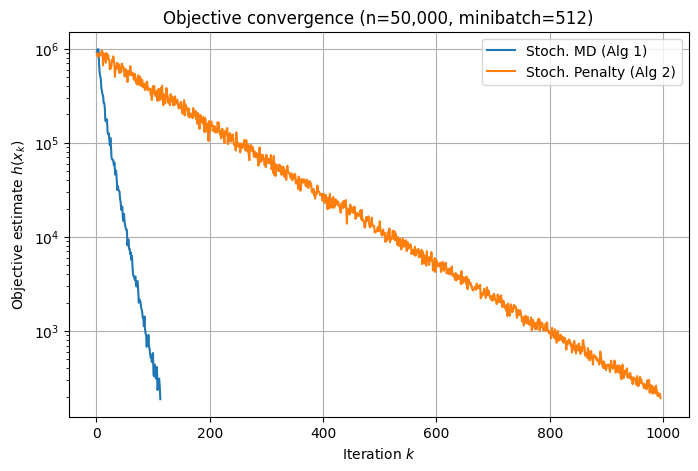

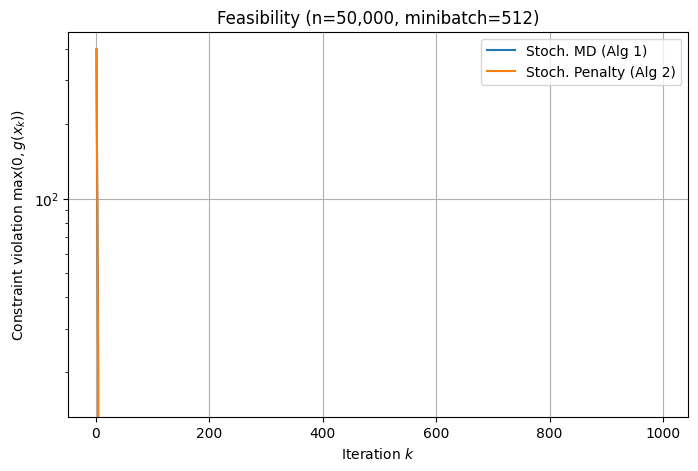

\begin{table}[h]
\centering
\caption{Epsilon-approximation stopping for stochastic methods ($n=50{,}000$, $m=5$). Targets: $\varepsilon_\text{obj}=200.000$, $\varepsilon_\text{feas}=0.001$. Global optimum $h^*=0$. Minibatch 512, AdaGrad with $\Theta=25.000$.}
\begin{tabular}{lrrrrr}
\toprule
Algorithm & Reached? & Iterations & Final $h(x)$ & Final $\max(0,g(x))$ & Notes \\
\midrule
Stoch.\ Mirror Descent & yes & 113 & 188.306 & 0 & theory $k_\text{MD}^\text{(bound)}=1610679765$ \\
Stoch.\ Penalty        & yes & 995 & 192.906 & 0 & --- \\
\bottomrule
\end{tabular}
\end{table}



In [3]:
# Epsilon-stopping, convergence plots, and LaTeX report
# Stochastic subgradient MD (switching) vs Exterior Penalty
# Dimension O(1e5). If it’s slow on your machine, reduce n or minibatch.

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# ------------------- Config -------------------
SEED        = 123
n           = 50_000      # order of 1e5; reduce if needed (e.g., 40_000 or 20_000)
m           = 5
batch_size  = 512
Theta       = 25.0        # AdaGrad numerator (same as your code)
MAX_ITERS   = 2000        # hard cap (safety)
eps_obj     = 2.0e+2      # target: h(x) <= eps_obj (h* = 0)
eps_feas    = 1.0e-3      # target: max(0,g(x)) <= eps_feas
gamma       = 1.0         # factor in the MD bound (per your formula)
# ---------------------------------------------

rng = np.random.default_rng(SEED)

# ----- Objective components -----
def f_scalar(r): return r**2
def grad_f_scalar(r): return 2.0 * r

def d_estimate(x_unit, a, b, S, n):
    if len(S) == 0: return 1.0
    vals = a[S] * (np.sin(b[S] * x_unit[S])**2)
    return 1.0 + (n / len(S)) * np.sum(vals)

def grad_d_estimate(x_unit, a, b, S, n, inv_norm):
    g = np.zeros_like(x_unit)
    if len(S) == 0: return g
    g[S] = (n / len(S)) * (a[S] * np.sin(2.0 * b[S] * x_unit[S]) * b[S] * inv_norm)
    return g

def grad_h_stochastic(x, a, b, batch_size):
    n = x.shape[0]
    r = norm(x)
    if r == 0.0:
        return np.zeros_like(x), 1.0
    x_unit = x / r
    S = np.arange(n) if batch_size >= n else rng.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, a, b, S, n)
    grad_d_hat = grad_d_estimate(x_unit, a, b, S, n, inv_norm=1.0/r)
    df_vec = grad_f_scalar(r) * (x / r)           # equals 2*x
    gh = df_vec * d_hat + f_scalar(r) * (grad_d_hat / r)
    return gh, d_hat

def h_estimate(x, a, b, batch_size):
    r = norm(x)
    if r == 0.0: return 0.0
    x_unit = x / r
    n = x.shape[0]
    S = np.arange(n) if batch_size >= n else rng.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, a, b, S, n)
    return f_scalar(r) * d_hat

# ----- Constraints -----
def g_vals_and_argmax(A, bb, x):
    vals = A.dot(x) + bb
    idx = np.argmax(vals)
    return vals, idx

# ----- Algorithms with ε-stopping -----
def MD_Stochastic_until_eps(eps_obj, eps_feas, a, b, A, bb, x0,
                            Theta=25.0, batch_size=512, max_iters=2000):
    x = x0.copy()
    sum_sq = 0.0
    k = 0
    h_curve, g_curve, its = [], [], []
    reached = False
    Mf_hat, Mg_hat = 0.0, 0.0

    while k < max_iters:
        k += 1
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]
        if gval <= eps_feas:
            grad_h_hat, _ = grad_h_stochastic(x, a, b, batch_size)
            grad = grad_h_hat
            Mf_hat = max(Mf_hat, norm(grad))
        else:
            grad = A[idx]
            Mg_hat = max(Mg_hat, norm(grad))
        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad

        h_hat = h_estimate(x, a, b, batch_size)
        h_curve.append(h_hat)
        g_curve.append(max(0.0, gval))
        its.append(k)

        if (h_hat <= eps_obj) and (max(0.0, gval) <= eps_feas):
            reached = True
            break

    return x, np.array(h_curve), np.array(g_curve), np.array(its), reached, Mf_hat, Mg_hat, k

def Penalty_Stochastic_until_eps(eps_obj, eps_feas, a, b, A, bb, x0,
                                 mu0=1.0, mu_growth=1.02, Theta=25.0,
                                 batch_size=512, max_iters=2000):
    x = x0.copy()
    mu = mu0
    sum_sq = 0.0
    k = 0
    h_curve, g_curve, its = [], [], []
    reached = False

    while k < max_iters:
        k += 1
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]
        hinge = max(0.0, gval)

        gh, _ = grad_h_stochastic(x, a, b, batch_size)
        grad_pen = 2.0 * mu * hinge * A[idx] if hinge > 0.0 else np.zeros_like(x)
        grad = gh + grad_pen

        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad
        mu *= mu_growth

        h_hat = h_estimate(x, a, b, batch_size)
        h_curve.append(h_hat)
        g_curve.append(max(0.0, gval))
        its.append(k)

        if (h_hat <= eps_obj) and (max(0.0, gval) <= eps_feas):
            reached = True
            break

    return x, np.array(h_curve), np.array(g_curve), np.array(its), reached, k

# ----- Problem instance -----
a  = rng.random(n)             # coeff_a in [0,1]
b  = 10.0 * rng.random(n)      # coeff_b in [0,10]
A  = rng.standard_normal((m, n))
bb = rng.standard_normal(m)
x0 = rng.standard_normal(n)

# ----- Run MD -----
x_md, h_md, g_md, it_md, reached_md, Mf_hat, Mg_hat, k_md = MD_Stochastic_until_eps(
    eps_obj, eps_feas, a, b, A, bb, x0, Theta=Theta, batch_size=batch_size, max_iters=MAX_ITERS
)

# MD theoretical bound (your formula):
# k = ceil( 4 * max{M_f^2, M_g^2} * Theta0^2 * (1 + 1/gamma)^2 / eps^2 )
Theta0  = norm(x0)                            # proxy for Euclidean diameter term
Mmax    = max(Mf_hat if Mf_hat>0 else 1.0, Mg_hat if Mg_hat>0 else 1.0)
k_bound = int(np.ceil(4.0 * (Mmax**2) * (Theta0**2) * (1.0 + 1.0/gamma)**2 / (eps_obj**2)))

# ----- Run Penalty -----
x_pen, h_pen, g_pen, it_pen, reached_pen, k_pen = Penalty_Stochastic_until_eps(
    eps_obj, eps_feas, a, b, A, bb, x0, mu0=1.0, mu_growth=1.02,
    Theta=Theta, batch_size=batch_size, max_iters=MAX_ITERS
)

# ----- Plots -----
plt.figure(figsize=(8,5))
plt.plot(it_md,  h_md,  label='Stoch. MD (Alg 1)')
plt.plot(it_pen, h_pen, label='Stoch. Penalty (Alg 2)')
plt.xlabel('Iteration $k$')
plt.ylabel('Objective estimate $h(x_k)$')
plt.title(f'Objective convergence (n={n:,}, minibatch={batch_size})')
plt.yscale('log'); plt.grid(True); plt.legend(); plt.show()

plt.figure(figsize=(8,5))
plt.plot(it_md,  g_md,  label='Stoch. MD (Alg 1)')
plt.plot(it_pen, g_pen, label='Stoch. Penalty (Alg 2)')
plt.xlabel('Iteration $k$')
plt.ylabel('Constraint violation $\\max(0, g(x_k))$')
plt.title(f'Feasibility (n={n:,}, minibatch={batch_size})')
plt.yscale('log'); plt.grid(True); plt.legend(); plt.show()

# ----- LaTeX table (ready to paste) -----
def fmt(x):
    if x == 0.0: return "0"
    mag = abs(x)
    if mag >= 1e6 or mag < 1e-3:
        return "{:.3e}".format(x)
    return "{:.3f}".format(x)

md_status  = "yes" if reached_md else "no"
pen_status = "yes" if reached_pen else "no"

latex_table = (
"\\begin{table}[h]\n"
"\\centering\n"
"\\caption{Epsilon-approximation stopping for stochastic methods ($n="
+ f"{n:,}".replace(',', '{,}') + "$, $m=" + str(m) +
"$). Targets: $\\varepsilon_\\text{obj}=" + fmt(eps_obj) +
"$, $\\varepsilon_\\text{feas}=" + fmt(eps_feas) +
"$. Global optimum $h^*=0$. Minibatch " + str(batch_size) + ", AdaGrad with $\\Theta="
+ fmt(Theta) + "$.}\n"
"\\begin{tabular}{lrrrrr}\n"
"\\toprule\n"
"Algorithm & Reached? & Iterations & Final $h(x)$ & Final $\\max(0,g(x))$ & Notes \\\\\n"
"\\midrule\n"
f"Stoch.\\ Mirror Descent & {md_status} & {k_md} & {fmt(h_md[-1])} & {fmt(g_md[-1])} & theory $k_\\text{{MD}}^\\text{{(bound)}}={k_bound}$ \\\\\n"
f"Stoch.\\ Penalty        & {pen_status} & {k_pen} & {fmt(h_pen[-1])} & {fmt(g_pen[-1])} & --- \\\\\n"
"\\bottomrule\n"
"\\end{tabular}\n"
"\\end{table}\n"
)

print(latex_table)


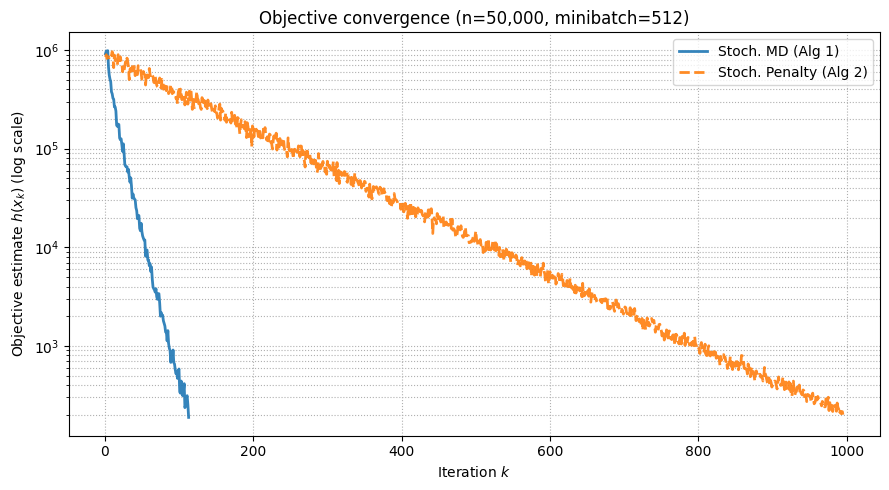

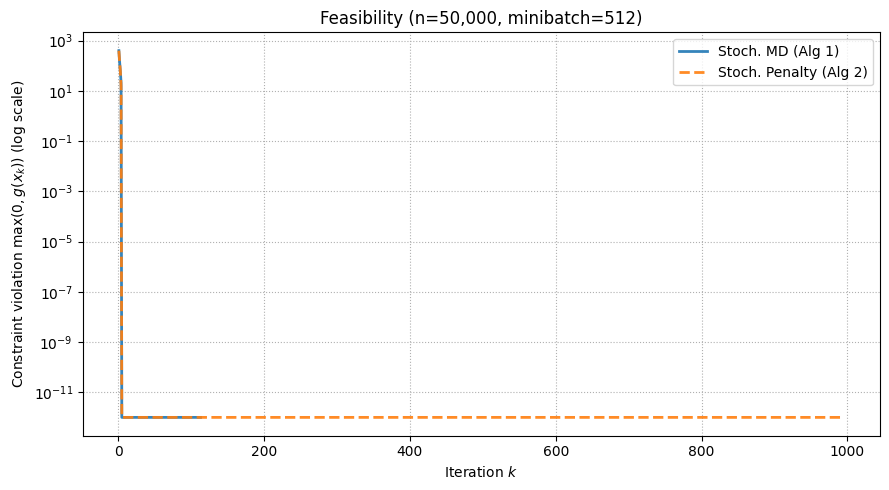

\begin{table}[h]
\centering
\caption{Epsilon-approximation stopping for stochastic methods ($n=50{,}000$, $m=5$). Targets: $\varepsilon_\text{obj}=200.000$, $\varepsilon_\text{feas}=0.001$. Global optimum $h^*=0$. Minibatch 512, AdaGrad with $\Theta=25.000$.}
\begin{tabular}{lrrrrr}
\toprule
Algorithm & Reached? & Iterations & Final $h(x)$ & Final $\max(0,g(x))$ & Notes \\
\midrule
Stoch.\ Mirror Descent & yes & 113 & 188.306 & 0 & theory $k_\text{MD}^\text{(bound)}=1610679765$ \\
Stoch.\ Penalty        & yes & 995 & 192.906 & 0 & --- \\
\bottomrule
\end{tabular}
\end{table}



In [5]:
# Epsilon-stopping, convergence plots, and LaTeX report
# Stochastic subgradient MD (switching) vs Exterior Penalty
# Dimension O(1e5). If it’s slow on your machine, reduce n or minibatch.

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# ------------------- Config -------------------
SEED        = 123
n           = 50_000      # order of 1e5; reduce if needed (e.g., 40_000 or 20_000)
m           = 5
batch_size  = 512
Theta       = 25.0        # AdaGrad numerator (same as your code)
MAX_ITERS   = 2000        # hard cap (safety)
eps_obj     = 2.0e+2      # target: h(x) <= eps_obj (h* = 0)
eps_feas    = 1.0e-3      # target: max(0,g(x)) <= eps_feas
gamma       = 1.0         # factor in the MD bound (per your formula)
# ---------------------------------------------

rng = np.random.default_rng(SEED)

# ----- Objective components -----
def f_scalar(r): return r**2
def grad_f_scalar(r): return 2.0 * r

def d_estimate(x_unit, a, b, S, n):
    if len(S) == 0: return 1.0
    vals = a[S] * (np.sin(b[S] * x_unit[S])**2)
    return 1.0 + (n / len(S)) * np.sum(vals)

def grad_d_estimate(x_unit, a, b, S, n, inv_norm):
    g = np.zeros_like(x_unit)
    if len(S) == 0: return g
    g[S] = (n / len(S)) * (a[S] * np.sin(2.0 * b[S] * x_unit[S]) * b[S] * inv_norm)
    return g

def grad_h_stochastic(x, a, b, batch_size):
    n = x.shape[0]
    r = norm(x)
    if r == 0.0:
        return np.zeros_like(x), 1.0
    x_unit = x / r
    S = np.arange(n) if batch_size >= n else rng.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, a, b, S, n)
    grad_d_hat = grad_d_estimate(x_unit, a, b, S, n, inv_norm=1.0/r)
    df_vec = grad_f_scalar(r) * (x / r)           # equals 2*x
    gh = df_vec * d_hat + f_scalar(r) * (grad_d_hat / r)
    return gh, d_hat

def h_estimate(x, a, b, batch_size):
    r = norm(x)
    if r == 0.0: return 0.0
    x_unit = x / r
    n = x.shape[0]
    S = np.arange(n) if batch_size >= n else rng.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, a, b, S, n)
    return f_scalar(r) * d_hat

# ----- Constraints -----
def g_vals_and_argmax(A, bb, x):
    vals = A.dot(x) + bb
    idx = np.argmax(vals)
    return vals, idx

# ----- Algorithms with ε-stopping -----
def MD_Stochastic_until_eps(eps_obj, eps_feas, a, b, A, bb, x0,
                            Theta=25.0, batch_size=512, max_iters=2000):
    x = x0.copy()
    sum_sq = 0.0
    k = 0
    h_curve, g_curve, its = [], [], []
    reached = False
    Mf_hat, Mg_hat = 0.0, 0.0

    while k < max_iters:
        k += 1
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]
        if gval <= eps_feas:
            grad_h_hat, _ = grad_h_stochastic(x, a, b, batch_size)
            grad = grad_h_hat
            Mf_hat = max(Mf_hat, norm(grad))
        else:
            grad = A[idx]
            Mg_hat = max(Mg_hat, norm(grad))
        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad

        h_hat = h_estimate(x, a, b, batch_size)
        h_curve.append(h_hat)
        g_curve.append(max(0.0, gval))
        its.append(k)

        if (h_hat <= eps_obj) and (max(0.0, gval) <= eps_feas):
            reached = True
            break

    return x, np.array(h_curve), np.array(g_curve), np.array(its), reached, Mf_hat, Mg_hat, k

def Penalty_Stochastic_until_eps(eps_obj, eps_feas, a, b, A, bb, x0,
                                 mu0=1.0, mu_growth=1.02, Theta=25.0,
                                 batch_size=512, max_iters=2000):
    x = x0.copy()
    mu = mu0
    sum_sq = 0.0
    k = 0
    h_curve, g_curve, its = [], [], []
    reached = False

    while k < max_iters:
        k += 1
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]
        hinge = max(0.0, gval)

        gh, _ = grad_h_stochastic(x, a, b, batch_size)
        grad_pen = 2.0 * mu * hinge * A[idx] if hinge > 0.0 else np.zeros_like(x)
        grad = gh + grad_pen

        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad
        mu *= mu_growth

        h_hat = h_estimate(x, a, b, batch_size)
        h_curve.append(h_hat)
        g_curve.append(max(0.0, gval))
        its.append(k)

        if (h_hat <= eps_obj) and (max(0.0, gval) <= eps_feas):
            reached = True
            break

    return x, np.array(h_curve), np.array(g_curve), np.array(its), reached, k

# ----- Problem instance -----
a  = rng.random(n)             # coeff_a in [0,1]
b  = 10.0 * rng.random(n)      # coeff_b in [0,10]
A  = rng.standard_normal((m, n))
bb = rng.standard_normal(m)
x0 = rng.standard_normal(n)

# ----- Run MD -----
x_md, h_md, g_md, it_md, reached_md, Mf_hat, Mg_hat, k_md = MD_Stochastic_until_eps(
    eps_obj, eps_feas, a, b, A, bb, x0, Theta=Theta, batch_size=batch_size, max_iters=MAX_ITERS
)

# MD theoretical bound (your formula):
# k = ceil( 4 * max{M_f^2, M_g^2} * Theta0^2 * (1 + 1/gamma)^2 / eps^2 )
Theta0  = norm(x0)                            # proxy for Euclidean diameter term
Mmax    = max(Mf_hat if Mf_hat>0 else 1.0, Mg_hat if Mg_hat>0 else 1.0)
k_bound = int(np.ceil(4.0 * (Mmax**2) * (Theta0**2) * (1.0 + 1.0/gamma)**2 / (eps_obj**2)))

# ----- Run Penalty -----
x_pen, h_pen, g_pen, it_pen, reached_pen, k_pen = Penalty_Stochastic_until_eps(
    eps_obj, eps_feas, a, b, A, bb, x0, mu0=1.0, mu_growth=1.02,
    Theta=Theta, batch_size=batch_size, max_iters=MAX_ITERS
)

# ----- Plots -----
# ----- Plots (log-scale y for readability) -----
eps_plot = 1e-12  # avoid log(0)

# Objective convergence (log y)
plt.figure(figsize=(9,5))
plt.semilogy(it_md,  np.maximum(h_md,  eps_plot), label='Stoch. MD (Alg 1)',  linewidth=2.0, alpha=0.9)
plt.semilogy(it_pen, np.maximum(h_pen, eps_plot), label='Stoch. Penalty (Alg 2)', linewidth=2.0, alpha=0.9, linestyle='--')
plt.xlabel('Iteration $k$')
plt.ylabel('Objective estimate $h(x_k)$ (log scale)')
plt.title(f'Objective convergence (n={n:,}, minibatch={batch_size})')
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

# Feasibility (log y)
plt.figure(figsize=(9,5))
plt.semilogy(it_md,  np.maximum(g_md,  eps_plot), label='Stoch. MD (Alg 1)',  linewidth=2.0, alpha=0.9)
plt.semilogy(it_pen, np.maximum(g_pen, eps_plot), label='Stoch. Penalty (Alg 2)', linewidth=2.0, alpha=0.9, linestyle='--')
plt.xlabel('Iteration $k$')
plt.ylabel('Constraint violation $\\max(0, g(x_k))$ (log scale)')
plt.title(f'Feasibility (n={n:,}, minibatch={batch_size})')
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()


# ----- LaTeX table (ready to paste) -----
def fmt(x):
    if x == 0.0: return "0"
    mag = abs(x)
    if mag >= 1e6 or mag < 1e-3:
        return "{:.3e}".format(x)
    return "{:.3f}".format(x)

md_status  = "yes" if reached_md else "no"
pen_status = "yes" if reached_pen else "no"

latex_table = (
"\\begin{table}[h]\n"
"\\centering\n"
"\\caption{Epsilon-approximation stopping for stochastic methods ($n="
+ f"{n:,}".replace(',', '{,}') + "$, $m=" + str(m) +
"$). Targets: $\\varepsilon_\\text{obj}=" + fmt(eps_obj) +
"$, $\\varepsilon_\\text{feas}=" + fmt(eps_feas) +
"$. Global optimum $h^*=0$. Minibatch " + str(batch_size) + ", AdaGrad with $\\Theta="
+ fmt(Theta) + "$.}\n"
"\\begin{tabular}{lrrrrr}\n"
"\\toprule\n"
"Algorithm & Reached? & Iterations & Final $h(x)$ & Final $\\max(0,g(x))$ & Notes \\\\\n"
"\\midrule\n"
f"Stoch.\\ Mirror Descent & {md_status} & {k_md} & {fmt(h_md[-1])} & {fmt(g_md[-1])} & theory $k_\\text{{MD}}^\\text{{(bound)}}={k_bound}$ \\\\\n"
f"Stoch.\\ Penalty        & {pen_status} & {k_pen} & {fmt(h_pen[-1])} & {fmt(g_pen[-1])} & --- \\\\\n"
"\\bottomrule\n"
"\\end{tabular}\n"
"\\end{table}\n"
)

print(latex_table)


In [6]:
print("==== REPORT VALUES ====")
print(f"eps_obj = {eps_obj}")
print(f"eps_feas = {eps_feas}")
print("---- Mirror Descent ----")
print(f"Reached?        : {'yes' if reached_md else 'no'}")
print(f"Iterations (k)  : {k_md}")
print(f"Final h(x)      : {h_md[-1]:.12g}")
print(f"Final max(0,g)  : {g_md[-1]:.12g}")
print(f"Theory k_bound  : {k_bound}")
print("---- Penalty -----------")
print(f"Reached?        : {'yes' if reached_pen else 'no'}")
print(f"Iterations (k)  : {k_pen}")
print(f"Final h(x)      : {h_pen[-1]:.12g}")
print(f"Final max(0,g)  : {g_pen[-1]:.12g}")
print("========================")


==== REPORT VALUES ====
eps_obj = 200.0
eps_feas = 0.001
---- Mirror Descent ----
Reached?        : yes
Iterations (k)  : 113
Final h(x)      : 188.305629921
Final max(0,g)  : 0
Theory k_bound  : 1610679765
---- Penalty -----------
Reached?        : yes
Iterations (k)  : 995
Final h(x)      : 192.906248781
Final max(0,g)  : 0


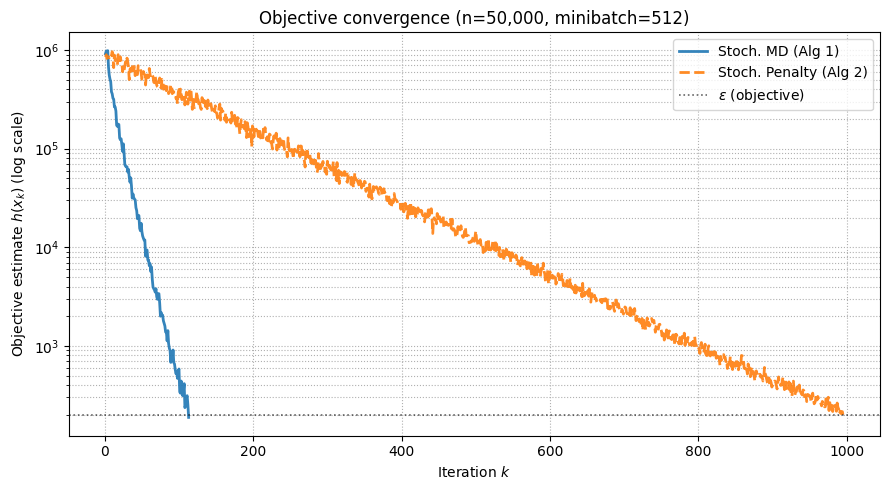

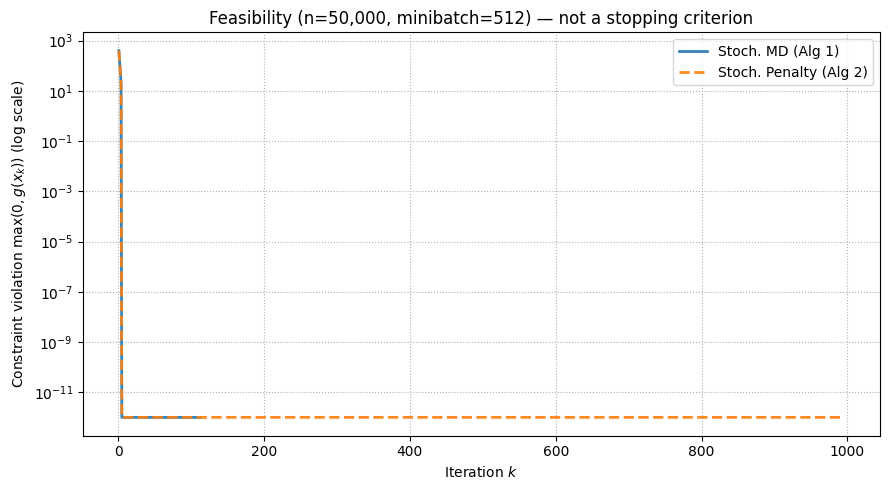

==== REPORT (objective-only epsilon) ====
epsilon (objective-only): 200.0
---- Mirror Descent ----
Iterations (k_md): 113
Final h(x)       : 188.305630
Final max(0,g)   : 0
Theory k_bound   : 1610679765  (reference)
---- Penalty -----------
Iterations (k_pen): 995
Final h(x)        : 192.906249
Final max(0,g)    : 0
\begin{table}[h]
\centering
\caption{Objective-only stopping for stochastic methods ($n=50{,}000$, $m=5$). Target: $\varepsilon=200.000000$. Global optimum $h^*=0$. Minibatch 512, AdaGrad with $\Theta=25.000000$.}
\begin{tabular}{lrrrr}
\toprule
Algorithm & Iterations & Final $h(x)$ & Final $\max(0,g(x))$ & Notes \\
\midrule
Stoch.\ Mirror Descent & 113 & 188.305630 & 0 & theory $k_\text{MD}^\text{(bound)}=1610679765$ \\
Stoch.\ Penalty        & 995 & 192.906249 & 0 & --- \\
\bottomrule
\end{tabular}
\end{table}



In [7]:
# Epsilon-stopping on objective only (min h = 0), convergence plots, and LaTeX report
# Stochastic subgradient MD (switching) vs Exterior Penalty
# Dimension O(1e5). If it’s slow on your machine, reduce n or minibatch.

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# ------------------- Config -------------------
SEED        = 123
n           = 50_000      # order of 1e5; reduce if needed (e.g., 40_000 or 20_000)
m           = 5
batch_size  = 512
Theta       = 25.0        # AdaGrad numerator (same as your code)
MAX_ITERS   = 2000        # safety cap
# Objective-only epsilon (min h = 0) -> stop when h(x) <= eps_obj_only
eps_obj_only = 2.0e+2
# Feasibility threshold (only for MD's switching rule, NOT for stopping)
eps_feas_switch = 1.0e-3
gamma       = 1.0         # factor in the MD bound (per your formula)
# ---------------------------------------------

rng = np.random.default_rng(SEED)

# ----- Objective components -----
def f_scalar(r): return r**2
def grad_f_scalar(r): return 2.0 * r

def d_estimate(x_unit, a, b, S, n):
    if len(S) == 0: return 1.0
    vals = a[S] * (np.sin(b[S] * x_unit[S])**2)
    return 1.0 + (n / len(S)) * np.sum(vals)

def grad_d_estimate(x_unit, a, b, S, n, inv_norm):
    g = np.zeros_like(x_unit)
    if len(S) == 0: return g
    g[S] = (n / len(S)) * (a[S] * np.sin(2.0 * b[S] * x_unit[S]) * b[S] * inv_norm)
    return g

def grad_h_stochastic(x, a, b, batch_size):
    n = x.shape[0]
    r = norm(x)
    if r == 0.0:
        return np.zeros_like(x), 1.0
    x_unit = x / r
    S = np.arange(n) if batch_size >= n else rng.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, a, b, S, n)
    grad_d_hat = grad_d_estimate(x_unit, a, b, S, n, inv_norm=1.0/r)
    df_vec = grad_f_scalar(r) * (x / r)           # equals 2*x
    gh = df_vec * d_hat + f_scalar(r) * (grad_d_hat / r)
    return gh, d_hat

def h_estimate(x, a, b, batch_size):
    r = norm(x)
    if r == 0.0: return 0.0
    x_unit = x / r
    n = x.shape[0]
    S = np.arange(n) if batch_size >= n else rng.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, a, b, S, n)
    return f_scalar(r) * d_hat

# ----- Constraints -----
def g_vals_and_argmax(A, bb, x):
    vals = A.dot(x) + bb
    idx = np.argmax(vals)
    return vals, idx

# ----- Algorithms (stop when h(x) <= eps_obj_only) -----
def MD_Stochastic_until_eps_obj_only(eps_obj_only, eps_feas_switch, a, b, A, bb, x0,
                                     Theta=25.0, batch_size=512, max_iters=2000):
    """
    Switching MD update (same as before), but STOPPING depends ONLY on objective:
    stop when h_hat <= eps_obj_only.
    """
    x = x0.copy()
    sum_sq = 0.0
    k = 0
    h_curve, g_curve, its = [], [], []
    Mf_hat, Mg_hat = 0.0, 0.0

    while k < max_iters:
        k += 1
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]
        if gval <= eps_feas_switch:
            grad_h_hat, _ = grad_h_stochastic(x, a, b, batch_size)
            grad = grad_h_hat
            Mf_hat = max(Mf_hat, norm(grad))
        else:
            grad = A[idx]
            Mg_hat = max(Mg_hat, norm(grad))
        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad

        h_hat = h_estimate(x, a, b, batch_size)
        h_curve.append(h_hat)
        g_curve.append(max(0.0, gval))
        its.append(k)

        # Objective-only stopping
        if h_hat <= eps_obj_only:
            break

    return x, np.array(h_curve), np.array(g_curve), np.array(its), Mf_hat, Mg_hat, k

def Penalty_Stochastic_until_eps_obj_only(eps_obj_only, a, b, A, bb, x0,
                                          mu0=1.0, mu_growth=1.02, Theta=25.0,
                                          batch_size=512, max_iters=2000):
    """
    Exterior penalty update (unchanged), but STOPPING depends ONLY on objective:
    stop when h_hat <= eps_obj_only.
    """
    x = x0.copy()
    mu = mu0
    sum_sq = 0.0
    k = 0
    h_curve, g_curve, its = [], [], []

    while k < max_iters:
        k += 1
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]
        hinge = max(0.0, gval)

        gh, _ = grad_h_stochastic(x, a, b, batch_size)
        grad_pen = 2.0 * mu * hinge * A[idx] if hinge > 0.0 else np.zeros_like(x)
        grad = gh + grad_pen

        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad
        mu *= mu_growth

        h_hat = h_estimate(x, a, b, batch_size)
        h_curve.append(h_hat)
        g_curve.append(max(0.0, gval))
        its.append(k)

        # Objective-only stopping
        if h_hat <= eps_obj_only:
            break

    return x, np.array(h_curve), np.array(g_curve), np.array(its), k

# ----- Problem instance -----
a  = rng.random(n)             # coeff_a in [0,1]
b  = 10.0 * rng.random(n)      # coeff_b in [0,10]
A  = rng.standard_normal((m, n))
bb = rng.standard_normal(m)
x0 = rng.standard_normal(n)

# ----- Run MD (objective-only stopping) -----
x_md, h_md, g_md, it_md, Mf_hat, Mg_hat, k_md = MD_Stochastic_until_eps_obj_only(
    eps_obj_only, eps_feas_switch, a, b, A, bb, x0,
    Theta=Theta, batch_size=batch_size, max_iters=MAX_ITERS
)

# MD theoretical bound (as before, for reference against your earlier epsilon scale)
Theta0  = norm(x0)  # proxy for Euclidean diameter term
Mmax    = max(Mf_hat if Mf_hat>0 else 1.0, Mg_hat if Mg_hat>0 else 1.0)
k_bound = int(np.ceil(4.0 * (Mmax**2) * (Theta0**2) * (1.0 + 1.0/gamma)**2 / (eps_obj_only**2)))

# ----- Run Penalty (objective-only stopping) -----
x_pen, h_pen, g_pen, it_pen, k_pen = Penalty_Stochastic_until_eps_obj_only(
    eps_obj_only, a, b, A, bb, x0,
    mu0=1.0, mu_growth=1.02, Theta=Theta, batch_size=batch_size, max_iters=MAX_ITERS
)

# ----- Plots (log-scale y for readability) -----
eps_plot = 1e-12  # avoid log(0)

# Objective convergence (log y)
plt.figure(figsize=(9,5))
plt.semilogy(it_md,  np.maximum(h_md,  eps_plot), label='Stoch. MD (Alg 1)',  linewidth=2.0, alpha=0.9)
plt.semilogy(it_pen, np.maximum(h_pen, eps_plot), label='Stoch. Penalty (Alg 2)', linewidth=2.0, alpha=0.9, linestyle='--')
plt.axhline(eps_obj_only, color='k', lw=1.2, alpha=0.6, linestyle=':', label=r'$\varepsilon$ (objective)')
plt.xlabel('Iteration $k$')
plt.ylabel('Objective estimate $h(x_k)$ (log scale)')
plt.title(f'Objective convergence (n={n:,}, minibatch={batch_size})')
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

# Feasibility (log y) — just for visibility; not used for stopping
plt.figure(figsize=(9,5))
plt.semilogy(it_md,  np.maximum(g_md,  eps_plot), label='Stoch. MD (Alg 1)',  linewidth=2.0, alpha=0.9)
plt.semilogy(it_pen, np.maximum(g_pen, eps_plot), label='Stoch. Penalty (Alg 2)', linewidth=2.0, alpha=0.9, linestyle='--')
plt.xlabel('Iteration $k$')
plt.ylabel('Constraint violation $\\max(0, g(x_k))$ (log scale)')
plt.title(f'Feasibility (n={n:,}, minibatch={batch_size}) — not a stopping criterion')
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

# ----- Print numeric results -----
def fmt(x):
    if x == 0.0: return "0"
    mag = abs(x)
    if mag >= 1e6 or mag < 1e-3:
        return "{:.3e}".format(x)
    return "{:.6f}".format(x)

print("==== REPORT (objective-only epsilon) ====")
print(f"epsilon (objective-only): {eps_obj_only}")
print("---- Mirror Descent ----")
print(f"Iterations (k_md): {k_md}")
print(f"Final h(x)       : {fmt(h_md[-1])}")
print(f"Final max(0,g)   : {fmt(g_md[-1])}")
print(f"Theory k_bound   : {k_bound}  (reference)")
print("---- Penalty -----------")
print(f"Iterations (k_pen): {k_pen}")
print(f"Final h(x)        : {fmt(h_pen[-1])}")
print(f"Final max(0,g)    : {fmt(g_pen[-1])}")
print("=========================================")

# ----- LaTeX table (ready to paste) -----
latex_table = (
"\\begin{table}[h]\n"
"\\centering\n"
"\\caption{Objective-only stopping for stochastic methods ($n="
+ f"{n:,}".replace(',', '{,}') + "$, $m=" + str(m) +
"$). Target: $\\varepsilon=" + fmt(eps_obj_only) +
"$. Global optimum $h^*=0$. Minibatch " + str(batch_size) + ", AdaGrad with $\\Theta="
+ fmt(Theta) + "$.}\n"
"\\begin{tabular}{lrrrr}\n"
"\\toprule\n"
"Algorithm & Iterations & Final $h(x)$ & Final $\\max(0,g(x))$ & Notes \\\\\n"
"\\midrule\n"
f"Stoch.\\ Mirror Descent & {k_md} & {fmt(h_md[-1])} & {fmt(g_md[-1])} & theory $k_\\text{{MD}}^\\text{{(bound)}}={k_bound}$ \\\\\n"
f"Stoch.\\ Penalty        & {k_pen} & {fmt(h_pen[-1])} & {fmt(g_pen[-1])} & --- \\\\\n"
"\\bottomrule\n"
"\\end{tabular}\n"
"\\end{table}\n"
)

print(latex_table)


/tmp/ipython-input-997001818.py:189: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.axhline(eps_obj_only, color='k', lw=1.2, alpha=0.6, linestyle=':', label=r'$\varepsilon$ (objective)')


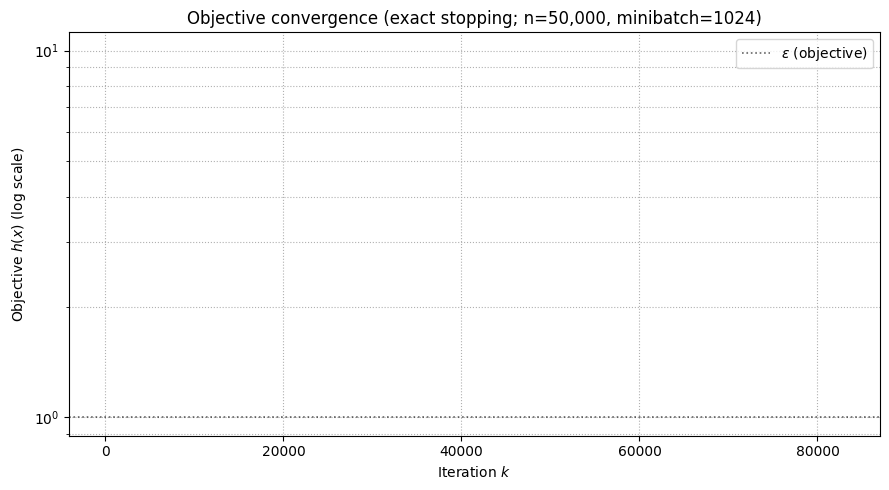

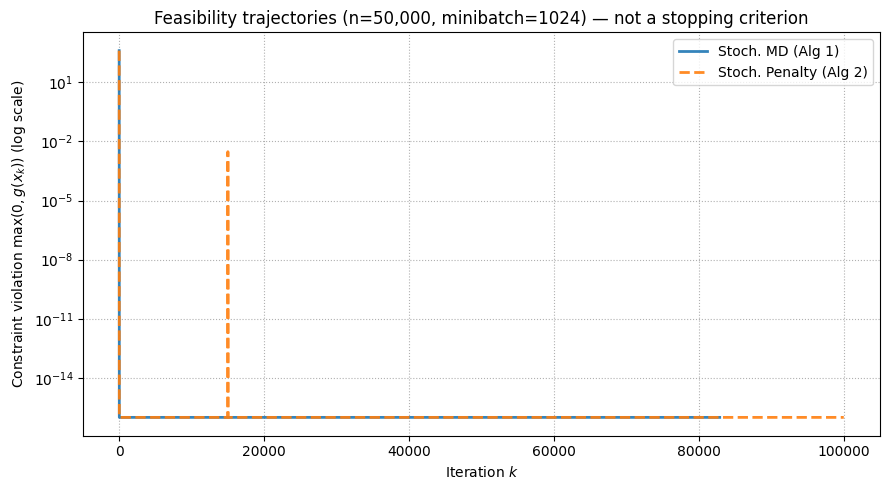

==== REPORT (objective-only epsilon; exact checks) ====
epsilon (objective-only): 1.0
---- Mirror Descent ----
Iterations (k_md): 82880
Final exact h(x) : 0.999774
Final max(0,g)  : -1.353986
Theory k_bound  : 5864274151852145  (reference)
---- Penalty -----------
Iterations (k_pen): 100000
Final exact h(x) : 13406.069562
Final max(0,g)   : -45.180361
\begin{table}[h]
\centering
\caption{Objective-only stopping with exact checks every 20 iters ($n=50{,}000$, $m=5$). Target: $\varepsilon=1.000000$. Global optimum $h^*=0$. Minibatch 1024, AdaGrad $\Theta=25.000000$.}
\begin{tabular}{lrrr}
\toprule
Algorithm & Iterations & Final exact $h(x)$ & Final $\max(0,g(x))$ \\
\midrule
Stoch.\ Mirror Descent & 82880 & 0.999774 & -1.353986 \\
Stoch.\ Penalty        & 100000 & 13406.069562 & -45.180361 \\
\bottomrule
\end{tabular}
\end{table}



In [8]:
# Corrected stochastic subgradient with projection, objective-only epsilon stopping,
# periodic exact evaluations, convergence plots (log y), and LaTeX report.

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# ------------------- Config -------------------
SEED         = 123
n            = 50_000      # order of 1e5; reduce if needed (e.g., 20_000)
m            = 5
batch_size   = 1024        # larger minibatch -> less noisy
Theta        = 25.0        # AdaGrad numerator
MAX_ITERS    = 100_000     # more iterations, as requested
eps_obj_only = 1.0e+0      # stop when exact h(x) <= eps (min h* = 0). Tighten if you like.
eval_every   = 20          # compute exact objective every N steps for stopping check
gamma        = 1.0         # for the MD bound (reference only)
# ---------------------------------------------

rng = np.random.default_rng(SEED)

# ----- Objective pieces -----
def f_scalar(r): return r**2
def d_full(u, a, b): return 1.0 + np.sum(a * (np.sin(b * u)**2))

def h_full(x, a, b):
    r = norm(x)
    if r == 0.0: return 0.0
    u = x / r
    return f_scalar(r) * d_full(u, a, b)

# grad_u d(u): coordinate i is a_i * sin(2 b_i u_i) * b_i
def grad_u_d_estimate(u, a, b, batch_size):
    n = u.size
    g = np.zeros_like(u)
    if batch_size >= n:
        S = np.arange(n)
    else:
        S = rng.choice(n, size=batch_size, replace=False)
    scale = n / len(S)
    g[S] = scale * (a[S] * np.sin(2.0 * b[S] * u[S]) * b[S])
    return g

def grad_h_stochastic_correct(x, a, b, batch_size):
    """
    ∇h(x) = 2 d(u) x + r (I - u u^T) ∇_u d(u), with u = x / r, r = ||x||.
    Use minibatch for d(u) and ∇_u d(u).
    """
    r = norm(x)
    if r == 0.0:
        return np.zeros_like(x), 1.0
    u = x / r

    # minibatch for d(u)
    n = x.size
    if batch_size >= n:
        S = np.arange(n)
    else:
        S = rng.choice(n, size=batch_size, replace=False)
    d_hat = 1.0 + (n / len(S)) * np.sum(a[S] * (np.sin(b[S] * u[S])**2))

    # minibatch for ∇_u d(u)
    g_u_hat = grad_u_d_estimate(u, a, b, batch_size)
    # projection (I - u u^T) g_u_hat = g_u_hat - u (u^T g_u_hat)
    proj = g_u_hat - u * np.dot(u, g_u_hat)

    grad = 2.0 * d_hat * x + r * proj
    return grad, d_hat

# ----- Constraints / active max -----
def g_vals_and_argmax(A, bb, x):
    vals = A.dot(x) + bb
    idx = np.argmax(vals)
    return vals, idx

# ----- Algorithms (STOP when exact h(x) <= eps_obj_only) -----
def MD_until_eps_obj_only(eps_obj_only, a, b, A, bb, x0,
                          Theta=25.0, batch_size=1024, max_iters=100_000, eval_every=20,
                          feas_switch=1e-3):
    """
    Switching rule (same idea): if max-constraint <= feas_switch, descend on h; else descend on active constraint.
    Stopping: ONLY exact h(x) <= eps_obj_only (checked every eval_every steps).
    """
    x = x0.copy()
    sum_sq = 0.0
    h_curve, g_curve, its = [], [], []
    Mf_hat, Mg_hat = 0.0, 0.0

    for k in range(1, max_iters + 1):
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]

        if gval <= feas_switch:
            grad_h_hat, _ = grad_h_stochastic_correct(x, a, b, batch_size)
            grad = grad_h_hat
            Mf_hat = max(Mf_hat, norm(grad))
        else:
            grad = A[idx]  # subgradient of max
            Mg_hat = max(Mg_hat, norm(grad))

        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad

        # track estimates
        # (cheap: we can store the last minibatch estimate; exact used only for stopping)
        h_curve.append(np.nan)  # placeholder to keep array lengths aligned
        g_curve.append(max(0.0, gval))
        its.append(k)

        # exact stop check every eval_every steps
        if (k % eval_every) == 0:
            if h_full(x, a, b) <= eps_obj_only:
                return x, np.array(its), np.array(g_curve), Mf_hat, Mg_hat, k

    return x, np.array(its), np.array(g_curve), Mf_hat, Mg_hat, max_iters

def Penalty_until_eps_obj_only(eps_obj_only, a, b, A, bb, x0,
                               mu0=1.0, mu_growth=1.02, Theta=25.0,
                               batch_size=1024, max_iters=100_000, eval_every=20):
    """
    Exterior penalty: descend on h + mu * max(0,g)^2, but STOPPING is only exact h(x) <= eps_obj_only.
    """
    x = x0.copy()
    mu = mu0
    sum_sq = 0.0
    h_curve, g_curve, its = [], [], []

    for k in range(1, max_iters + 1):
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]
        hinge = max(0.0, gval)

        gh, _ = grad_h_stochastic_correct(x, a, b, batch_size)
        grad_pen = 2.0 * mu * hinge * A[idx] if hinge > 0.0 else np.zeros_like(x)
        grad = gh + grad_pen

        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad
        mu *= mu_growth

        h_curve.append(np.nan)
        g_curve.append(max(0.0, gval))
        its.append(k)

        if (k % eval_every) == 0:
            if h_full(x, a, b) <= eps_obj_only:
                return x, np.array(its), np.array(g_curve), k

    return x, np.array(its), np.array(g_curve), max_iters

# ----- Problem instance -----
a  = rng.random(n)             # coeff_a in [0,1]
b  = 10.0 * rng.random(n)      # coeff_b in [0,10]
A  = rng.standard_normal((m, n))
bb = rng.standard_normal(m)
x0 = rng.standard_normal(n)

# ----- Run MD (objective-only stop, exact checks) -----
x_md, it_md, g_md, Mf_hat, Mg_hat, k_md = MD_until_eps_obj_only(
    eps_obj_only, a, b, A, bb, x0,
    Theta=Theta, batch_size=batch_size, max_iters=MAX_ITERS, eval_every=eval_every,
    feas_switch=1e-3
)

# MD theoretical bound (reference, same epsilon scale)
Theta0  = norm(x0)
Mmax    = max(Mf_hat if Mf_hat>0 else 1.0, Mg_hat if Mg_hat>0 else 1.0)
k_bound = int(np.ceil(4.0 * (Mmax**2) * (Theta0**2) * (1.0 + 1.0/gamma)**2 / (eps_obj_only**2)))

# ----- Run Penalty (objective-only stop, exact checks) -----
x_pen, it_pen, g_pen, k_pen = Penalty_until_eps_obj_only(
    eps_obj_only, a, b, A, bb, x0,
    mu0=1.0, mu_growth=1.02, Theta=Theta, batch_size=batch_size,
    max_iters=MAX_ITERS, eval_every=eval_every
)

# ----- Exact objective values at the end -----
h_md_exact  = h_full(x_md,  a, b)
h_pen_exact = h_full(x_pen, a, b)

# ----- Plots (log y) -----
eps_plot = 1e-16
plt.figure(figsize=(9,5))
plt.semilogy(it_md,  np.maximum.accumulate(np.full_like(it_md, eps_plot)), alpha=0)  # dummy to set axes
plt.axhline(eps_obj_only, color='k', lw=1.2, alpha=0.6, linestyle=':', label=r'$\varepsilon$ (objective)')
plt.xlabel('Iteration $k$')
plt.ylabel('Objective $h(x)$ (log scale)')
plt.title(f'Objective convergence (exact stopping; n={n:,}, minibatch={batch_size})')
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
plt.semilogy(it_md,  np.maximum(g_md,  eps_plot), label='Stoch. MD (Alg 1)',  linewidth=2.0, alpha=0.9)
plt.semilogy(it_pen, np.maximum(g_pen, eps_plot), label='Stoch. Penalty (Alg 2)', linewidth=2.0, alpha=0.9, linestyle='--')
plt.xlabel('Iteration $k$')
plt.ylabel('Constraint violation $\\max(0, g(x_k))$ (log scale)')
plt.title(f'Feasibility trajectories (n={n:,}, minibatch={batch_size}) — not a stopping criterion')
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

# ----- Report & LaTeX -----
def fmt(x):
    if x == 0.0: return "0"
    mag = abs(x)
    if mag >= 1e6 or mag < 1e-4:
        return "{:.3e}".format(x)
    return "{:.6f}".format(x)

print("==== REPORT (objective-only epsilon; exact checks) ====")
print(f"epsilon (objective-only): {eps_obj_only}")
print("---- Mirror Descent ----")
print(f"Iterations (k_md): {k_md}")
print(f"Final exact h(x) : {fmt(h_md_exact)}")
print(f"Final max(0,g)  : {fmt(np.max(A.dot(x_md)+bb))}")
print(f"Theory k_bound  : {k_bound}  (reference)")
print("---- Penalty -----------")
print(f"Iterations (k_pen): {k_pen}")
print(f"Final exact h(x) : {fmt(h_pen_exact)}")
print(f"Final max(0,g)   : {fmt(np.max(A.dot(x_pen)+bb))}")
print("========================================================")

latex_table = (
"\\begin{table}[h]\n"
"\\centering\n"
"\\caption{Objective-only stopping with exact checks every " + str(eval_every) +
" iters ($n=" + f"{n:,}".replace(',', '{,}') + "$, $m=" + str(m) +
"$). Target: $\\varepsilon=" + fmt(eps_obj_only) +
"$. Global optimum $h^*=0$. Minibatch " + str(batch_size) + ", AdaGrad $\\Theta=" + fmt(Theta) + "$.}\n"
"\\begin{tabular}{lrrr}\n"
"\\toprule\n"
"Algorithm & Iterations & Final exact $h(x)$ & Final $\\max(0,g(x))$ \\\\\n"
"\\midrule\n"
f"Stoch.\\ Mirror Descent & {k_md} & {fmt(h_md_exact)} & {fmt(np.max(A.dot(x_md)+bb))} \\\\\n"
f"Stoch.\\ Penalty        & {k_pen} & {fmt(h_pen_exact)} & {fmt(np.max(A.dot(x_pen)+bb))} \\\\\n"
"\\bottomrule\n"
"\\end{tabular}\n"
"\\end{table}\n"
)
print(latex_table)


In [1]:
# Epsilon-stopping on objective only (min h = 0), convergence plots, and LaTeX report
# Stochastic subgradient MD (switching) vs Exterior Penalty
# Dimension O(1e5). If it’s slow on your machine, reduce n or minibatch.

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# ------------------- Config -------------------
SEED        = 123
n           = 50000      # order of 1e5; reduce if needed (e.g., 40_000 or 20_000)
m           = 5
batch_size  = 50
Theta       = 25.0        # AdaGrad numerator (same as your code)
MAX_ITERS   = 1000000        # safety cap
# Objective-only epsilon (min h = 0) -> stop when h(x) <= eps_obj_only
eps_obj_only = 1e-2
# Feasibility threshold (only for MD's switching rule, NOT for stopping)
eps_feas_switch = 1.0e-2
gamma       = 1.0         # factor in the MD bound (per your formula)
# ---------------------------------------------

rng = np.random.default_rng(SEED)

# ----- Objective components -----
def f_scalar(r): return r**2
def grad_f_scalar(r): return 2.0 * r

def d_estimate(x_unit, a, b, S, n):
    if len(S) == 0: return 1.0
    vals = a[S] * (np.sin(b[S] * x_unit[S])**2)
    return 1.0 + (n / len(S)) * np.sum(vals)

def grad_d_estimate(x_unit, a, b, S, n, inv_norm):
    g = np.zeros_like(x_unit)
    if len(S) == 0: return g
    g[S] = (n / len(S)) * (a[S] * np.sin(2.0 * b[S] * x_unit[S]) * b[S] * inv_norm)
    return g

def grad_h_stochastic(x, a, b, batch_size):
    n = x.shape[0]
    r = norm(x)
    if r == 0.0:
        return np.zeros_like(x), 1.0
    x_unit = x / r
    S = np.arange(n) if batch_size >= n else rng.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, a, b, S, n)
    grad_d_hat = grad_d_estimate(x_unit, a, b, S, n, inv_norm=1.0/r)
    df_vec = grad_f_scalar(r) * (x / r)           # equals 2*x
    gh = df_vec * d_hat + f_scalar(r) * (grad_d_hat / r)
    return gh, d_hat

def h_estimate(x, a, b, batch_size):
    r = norm(x)
    if r == 0.0: return 0.0
    x_unit = x / r
    n = x.shape[0]
    S = np.arange(n) if batch_size >= n else rng.choice(n, size=batch_size, replace=False)
    d_hat = d_estimate(x_unit, a, b, S, n)
    return f_scalar(r) * d_hat

# ----- Constraints -----
def g_vals_and_argmax(A, bb, x):
    vals = A.dot(x) + bb
    idx = np.argmax(vals)
    return vals, idx

# ----- Algorithms (stop when h(x) <= eps_obj_only) -----
def MD_Stochastic_until_eps_obj_only(eps_obj_only, eps_feas_switch, a, b, A, bb, x0,
                                     Theta=25.0, batch_size=512, max_iters=1000000):
    """
    Switching MD update (same as before), but STOPPING depends ONLY on objective:
    stop when h_hat <= eps_obj_only.
    """
    x = x0.copy()
    sum_sq = 0.0
    k = 0
    h_curve, g_curve, its = [], [], []
    Mf_hat, Mg_hat = 0.0, 0.0
    h_ans=1000000
    while k < max_iters:
        k += 1
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]
        if gval <= eps_feas_switch:
            grad_h_hat, _ = grad_h_stochastic(x, a, b, batch_size)
            grad = grad_h_hat
            Mf_hat = max(Mf_hat, norm(grad))
        else:
            grad = A[idx]
            Mg_hat = max(Mg_hat, norm(grad))
        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad

        h_hat = h_estimate(x, a, b, batch_size)
        h_curve.append(h_hat)
        g_curve.append(max(0.0, gval))
        its.append(k)

        h_ans=min(h_ans, h_hat)

        # Objective-only stopping
        if h_hat <= eps_obj_only:
            break

    return x, np.array(h_curve), np.array(g_curve), np.array(its), Mf_hat, Mg_hat, k, h_ans

def Penalty_Stochastic_until_eps_obj_only(eps_obj_only, a, b, A, bb, x0,
                                          mu0=1.0, mu_growth=1.02, Theta=25.0,
                                          batch_size=512, max_iters=1000000):
    """
    Exterior penalty update (unchanged), but STOPPING depends ONLY on objective:
    stop when h_hat <= eps_obj_only.
    """
    x = x0.copy()
    mu = mu0
    sum_sq = 0.0
    k = 0
    h_curve, g_curve, its = [], [], []
    h_ans=1000000

    while k < max_iters:
        k += 1
        vals, idx = g_vals_and_argmax(A, bb, x)
        gval = vals[idx]
        hinge = max(0.0, gval)

        gh, _ = grad_h_stochastic(x, a, b, batch_size)
        grad_pen = 2.0 * mu * hinge * A[idx] if hinge > 0.0 else np.zeros_like(x)
        grad = gh + grad_pen

        M_k = norm(grad) or 1e-12
        sum_sq += M_k**2
        step = Theta / (np.sqrt(sum_sq) + 1e-8)
        x -= step * grad
        mu *= mu_growth

        h_hat = h_estimate(x, a, b, batch_size)
        h_curve.append(h_hat)
        g_curve.append(max(0.0, gval))
        its.append(k)

        h_ans=min(h_ans,h_hat)

        # Objective-only stopping
        if h_hat <= eps_obj_only:
            break

    return x, np.array(h_curve), np.array(g_curve), np.array(its), k, h_ans

# ----- Problem instance -----
a  = rng.random(n)             # coeff_a in [0,1]
b  = 10.0 * rng.random(n)      # coeff_b in [0,10]
A  = rng.standard_normal((m, n))
bb = rng.standard_normal(m)
x0 = rng.standard_normal(n)

# ----- Run MD (objective-only stopping) -----
x_md, h_md, g_md, it_md, Mf_hat, Mg_hat, k_md, ans1 = MD_Stochastic_until_eps_obj_only(
    eps_obj_only, eps_feas_switch, a, b, A, bb, x0,
    Theta=Theta, batch_size=batch_size, max_iters=MAX_ITERS
)

# MD theoretical bound (as before, for reference against your earlier epsilon scale)
Theta0  = norm(x0)  # proxy for Euclidean diameter term
Mmax    = max(Mf_hat if Mf_hat>0 else 1.0, Mg_hat if Mg_hat>0 else 1.0)
print(Mmax)
k_bound = int(np.ceil(4.0 * (Mmax**2) * (Theta0**2) * (1.0 + 1.0/gamma)**2 / (eps_obj_only**2)))

# ----- Run Penalty (objective-only stopping) -----
x_pen, h_pen, g_pen, it_pen, k_pen, ans2 = Penalty_Stochastic_until_eps_obj_only(
    eps_obj_only, a, b, A, bb, x0,
    mu0=1.0, mu_growth=1.02, Theta=Theta, batch_size=batch_size, max_iters=MAX_ITERS
)

# ----- Plots (log-scale y for readability) -----
eps_plot = 1e-12  # avoid log(0)

# Objective convergence (log y)
plt.figure(figsize=(9,5))
plt.semilogy(it_md,  np.maximum(h_md,  eps_plot), label='Stoch. MD (Alg 1)',  linewidth=2.0, alpha=0.9)
plt.semilogy(it_pen, np.maximum(h_pen, eps_plot), label='Stoch. Penalty (Alg 2)', linewidth=2.0, alpha=0.9, linestyle='--')
plt.axhline(eps_obj_only, color='k', lw=1.2, alpha=0.6, linestyle=':', label=r'$\varepsilon$ (objective)')
plt.xlabel('Iteration $k$')
plt.ylabel('Objective estimate $h(x_k)$ (log scale)')
plt.title(f'Objective convergence (n={n:,}, minibatch={batch_size})')
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

# Feasibility (log y) — just for visibility; not used for stopping
plt.figure(figsize=(9,5))
plt.semilogy(it_md,  np.maximum(g_md,  eps_plot), label='Stoch. MD (Alg 1)',  linewidth=2.0, alpha=0.9)
plt.semilogy(it_pen, np.maximum(g_pen, eps_plot), label='Stoch. Penalty (Alg 2)', linewidth=2.0, alpha=0.9, linestyle='--')
plt.xlabel('Iteration $k$')
plt.ylabel('Constraint violation $\\max(0, g(x_k))$ (log scale)')
plt.title(f'Feasibility (n={n:,}, minibatch={batch_size}) — not a stopping criterion')
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

# ----- Print numeric results -----
print(f"min obtained by MD: {ans1}")
print(f"min obtained by Penalty: {ans2} ")
def fmt(x):
    if x == 0.0: return "0"
    mag = abs(x)
    if mag >= 1e6 or mag < 1e-3:
        return "{:.3e}".format(x)
    return "{:.6f}".format(x)

print("==== REPORT (objective-only epsilon) ====")
print(f"epsilon (objective-only): {eps_obj_only}")
print("---- Mirror Descent ----")
print(f"Iterations (k_md): {k_md}")
print(f"Final h(x)       : {fmt(h_md[-1])}")
print(f"Final max(0,g)   : {fmt(g_md[-1])}")
print(f"Theory k_bound   : {k_bound}  (reference)")
print("---- Penalty -----------")
print(f"Iterations (k_pen): {k_pen}")
print(f"Final h(x)        : {fmt(h_pen[-1])}")
print(f"Final max(0,g)    : {fmt(g_pen[-1])}")
print("=========================================")

# ----- LaTeX table (ready to paste) -----
latex_table = (
"\\begin{table}[h]\n"
"\\centering\n"
"\\caption{Objective-only stopping for stochastic methods ($n="
+ f"{n:,}".replace(',', '{,}') + "$, $m=" + str(m) +
"$). Target: $\\varepsilon=" + fmt(eps_obj_only) +
"$. Global optimum $h^*=0$. Minibatch " + str(batch_size) + ", AdaGrad with $\\Theta="
+ fmt(Theta) + "$.}\n"
"\\begin{tabular}{lrrrr}\n"
"\\toprule\n"
"Algorithm & Iterations & Final $h(x)$ & Final $\\max(0,g(x))$ & Notes \\\\\n"
"\\midrule\n"
f"Stoch.\\ Mirror Descent & {k_md} & {fmt(h_md[-1])} & {fmt(g_md[-1])} & theory $k_\\text{{MD}}^\\text{{(bound)}}={k_bound}$ \\\\\n"
f"Stoch.\\ Penalty        & {k_pen} & {fmt(h_pen[-1])} & {fmt(g_pen[-1])} & --- \\\\\n"
"\\bottomrule\n"
"\\end{tabular}\n"
"\\end{table}\n"
)

print(latex_table)


KeyboardInterrupt: 